In [7]:
import pandas as pd

df = pd.read_csv("Instagram_fake_profile_dataset.csv")
print(df.shape)
print(df.head())
print(df.columns)


(5000, 12)
   profile pic  nums/length username  fullname words  nums/length fullname  \
0            1                  0.27               0                   0.0   
1            1                  0.00               2                   0.0   
2            1                  0.10               2                   0.0   
3            1                  0.00               1                   0.0   
4            1                  0.00               2                   0.0   

   name==username  description length  external URL  private  #posts  \
0               0                  53             0        0      32   
1               0                  44             0        0     286   
2               0                   0             0        1      13   
3               0                  82             0        0     679   
4               0                   0             0        1       6   

   #followers  #follows  fake  
0        1000       955     0  
1        2740       533

Dataset shape: (5000, 12)
Fitting 5 folds for each of 24 candidates, totalling 120 fits

Best Parameters Found:
{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}

=== Classification Report ===
              precision    recall  f1-score   support

           0     0.9900    0.9920    0.9910       500
           1     0.9920    0.9900    0.9910       500

    accuracy                         0.9910      1000
   macro avg     0.9910    0.9910    0.9910      1000
weighted avg     0.9910    0.9910    0.9910      1000

Accuracy: 0.991
ROC AUC: 0.9996659999999999


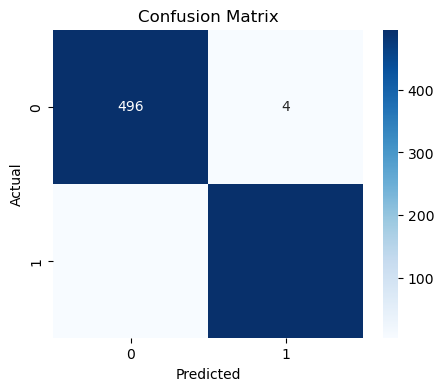

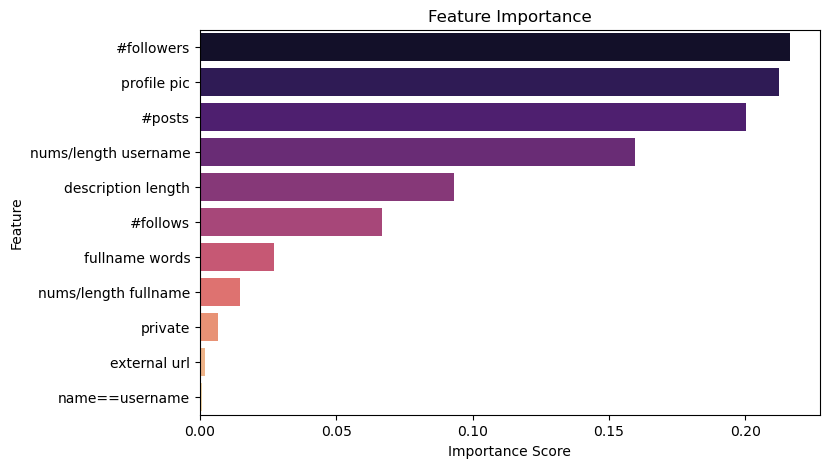

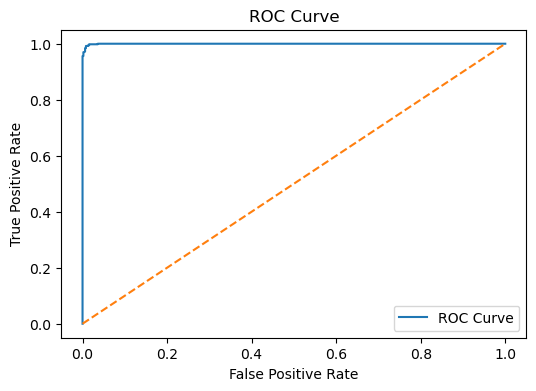


=== Sample Predictions on Test Data ===
  Predicted_Label Actual_Label
0         Genuine      Genuine
1            Fake         Fake
2         Genuine      Genuine
3            Fake         Fake
4            Fake         Fake
5            Fake         Fake
6            Fake         Fake
7            Fake         Fake
8         Genuine      Genuine
9         Genuine      Genuine

Total Fake predicted: 499
Total Genuine predicted: 501

✅ Model saved as 'instagram_fake_profile_model.joblib'

Profile Prediction: Genuine (Fake Probability: 0.03)


{'fake_probability': 0.03, 'prediction': 'Genuine'}

In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import joblib

# Load dataset
df = pd.read_csv("Instagram_fake_profile_dataset.csv")

# Separate features and target
X = df.drop('fake', axis=1)
y = df['fake']

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# RandomForest with GridSearchCV
rf = RandomForestClassifier(random_state=42)
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

# Best model
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test_scaled)

# Evaluation
print(f"Dataset shape: {df.shape}")
print("\nBest Parameters:", grid_search.best_params_)
print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Save model and scaler
joblib.dump(best_rf, "fake_profile_detector.pkl")
joblib.dump(scaler, "scaler.pkl")

# --- Prediction Function ---
def predict_profile(data):
    """
    Predicts if the given Instagram profile is Fake or Genuine.
    `data` should be a list of feature values in correct order.
    """
    model = joblib.load("fake_profile_detector.pkl")
    scaler = joblib.load("scaler.pkl")
    scaled_data = scaler.transform([data])
    prediction = model.predict(scaled_data)[0]
    result = "🚨 Fake Account" if prediction == 1 else "✅ Genuine Account"
    print(f"\nPrediction: {result}")
    return result

# --- Example test with random profile from dataset ---
print("\n--- Random Profile Test ---")
random_profile = X.sample(1, random_state=42).values[0]
print("Profile data:", random_profile)
predict_profile(random_profile)
